## Clustering Model: Model with Product Category

Set up a basic pipeline using **standardized preprocessing from preprocess.py** and distilbert.

## 🔧 Steps:
1. Import Libraries and load data using **preprocess.py functions**
2. Preprocessing: refer data_preprocessing.ipynb notebook
3. Vectorization: TF-IDF Vectorization
4. Model: K-Means clustering on Product Name
5. Evaluation: Clustering

##  ✅ Purpose:
Establish a working pipeline using **standardized preprocessing functions** and maintain baseline score (~70-80% accuracy expected).

## Load Libraries

In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bshanmugam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bshanmugam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bshanmugam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Step 1: Load the Cleaned data

In [24]:
df = pd.read_csv('data/cleaned_amazon_reviews_final.csv')
print(df.head())
print(df.info())


                                       product_names       asins   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   

                                          categories primaryCategories  \
0  Computers,Electronics Features,Tablets,Electro...       Electronics   
1  Computers,Electronics Features,Tablets,Electro...       Electronics   
2  Computers,Electronics Features,Tablets,Electro...       Electronics   
3  Computers,Electronics Features,Tablets,Electro...       Electronics   
4  Computers,Electronics Features,Tablets,Electro...       Electronics   

                                           imageURLs doRecommend  rating  \
0  https://pisces.bbys

## Step 2: Preprocess and Vectorize text using TF-IDF

In [25]:
	
name_vectorizer = TfidfVectorizer(stop_words='english')
product_names = df['product_names'].unique()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(product_names)
print(f"TF-IDF Matrix Shape: {X.shape}")


TF-IDF Matrix Shape: (78, 238)


## Step 3: K-Means Elbow Method

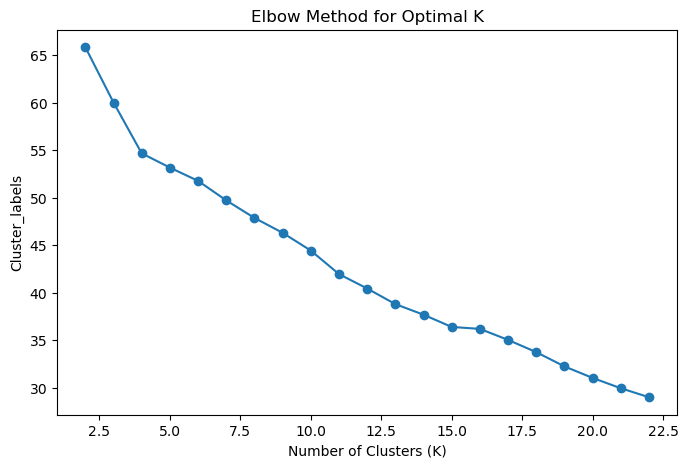

In [26]:
Cluster_labels = []  
k_values = range(2, 23) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    Cluster_labels.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, Cluster_labels, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Cluster_labels')
plt.show()

## Step 4: K-Means Silhouette Score

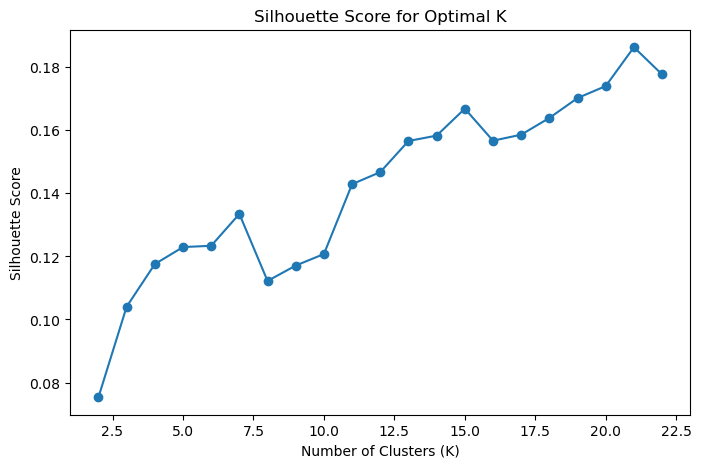

In [27]:
silhouette_scores = []
valid_k = []
for k in k_values:
    if k == 1:
        continue  # Silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    valid_k.append(k)

plt.figure(figsize=(8, 5))
plt.plot(valid_k, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

 ## Step 5: K-Means Clustering

In [28]:
kmeans = KMeans(n_clusters=23, random_state=42)
kmeans.fit(X)

# Attach cluster labels back to product names
product_clusters = pd.DataFrame({
    'product_name': product_names,
    'cluster': kmeans.labels_
})
# Step 4: View grouped products by cluster
for i in range(kmeans.n_clusters):
    print(f"\nCluster {i}:\n")
    print(product_clusters[product_clusters['cluster'] == i]['product_name'].tolist())


Cluster 0:

['AmazonBasics AAA Performance Alkaline Batteries (36 Count)', 'AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary']

Cluster 1:

['All-New Kindle Oasis E-reader - 7 High-Resolution Display (300 ppi), Waterproof, Built-In Audible, 32 GB, Wi-Fi + Free Cellular Connectivity', 'All-New Kindle Oasis E-reader - 7 High-Resolution Display (300 ppi), Waterproof, Built-In Audible, 8 GB, Wi-Fi - Includes Special Offers', 'All-New Kindle Oasis E-reader - 7 High-Resolution Display (300 ppi), Waterproof, Built-In Audible, 32 GB, Wi-Fi - Includes Special Offers']

Cluster 2:

['Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black', 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Blue', 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Blue', 'Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum', 'All-New Fire HD 8 Tablet, 8" HD Display, Wi-

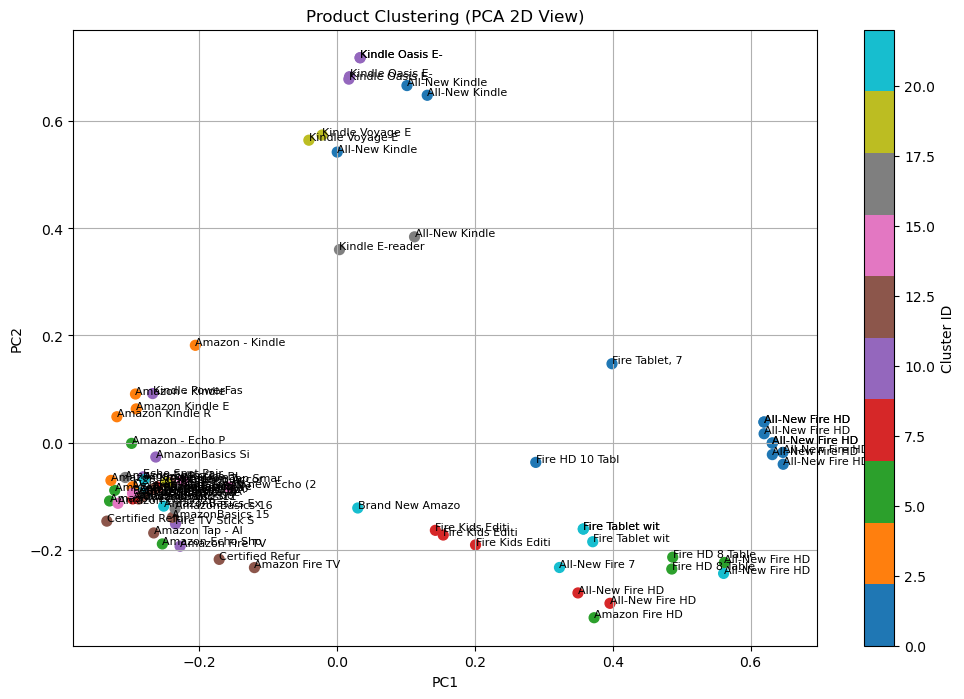

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(X.toarray())

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(reduced[:, 0], reduced[:, 1], c=kmeans.labels_, cmap='tab10', s=50)
for i, name in enumerate(product_names):
    plt.text(reduced[i, 0], reduced[i, 1], name[:15], fontsize=8)
plt.title('Product Clustering (PCA 2D View)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster ID')
plt.grid(True)
plt.show()

In [30]:
import seaborn as sns

# Merge cluster assignments into df
df = df.merge(product_clusters, left_on='name', right_on='product_name', how='left')
df = df.rename(columns={'cluster': 'name_cluster'})

sns.countplot(x='name_cluster', data=df, palette='Set2')
plt.title('Number of Reviews per Product Name Cluster')
plt.xlabel('Name Cluster')
plt.ylabel('Review Count')
plt.show()

KeyError: 'name'

## Step 6: Analyze Clusters

In [ ]:
# Count the number of products in each cluster
cluster_counts = df['name_cluster'].value_counts().sort_index()
print(cluster_counts)

# Display sample products from each cluster
for cluster_id in range(kmeans.n_clusters):
    print(f"Cluster {cluster_id}:")
    print(df[df['name_cluster'] == cluster_id]['name'].sample(3))  # Display 3 random samples
    print("\n")

name_cluster
0     9242
1       33
2     5028
3      474
4       67
5       63
6       18
7       77
8     2206
9       12
10     139
11       5
12     236
13       9
14       6
15       6
16    1371
17     590
18       5
19     456
20      13
21       1
22       6
Name: count, dtype: int64
Cluster 0:
6568     AmazonBasics AAA Performance Alkaline Batterie...
8300     AmazonBasics AAA Performance Alkaline Batterie...
10403    AmazonBasics AAA Performance Alkaline Batterie...
Name: name, dtype: object


Cluster 1:
19515    All-New Kindle Oasis E-reader - 7 High-Resolut...
19722    All-New Kindle Oasis E-reader - 7 High-Resolut...
19717    All-New Kindle Oasis E-reader - 7 High-Resolut...
Name: name, dtype: object


Cluster 2:
18222    All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...
3721     All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...
19265    All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...
Name: name, dtype: object


Cluster 3:
4106    Brand New Amazon Kindle Fire 16gb 7" Ips 

ValueError: Cannot take a larger sample than population when 'replace=False'

## Step 7: Visualize Clusters

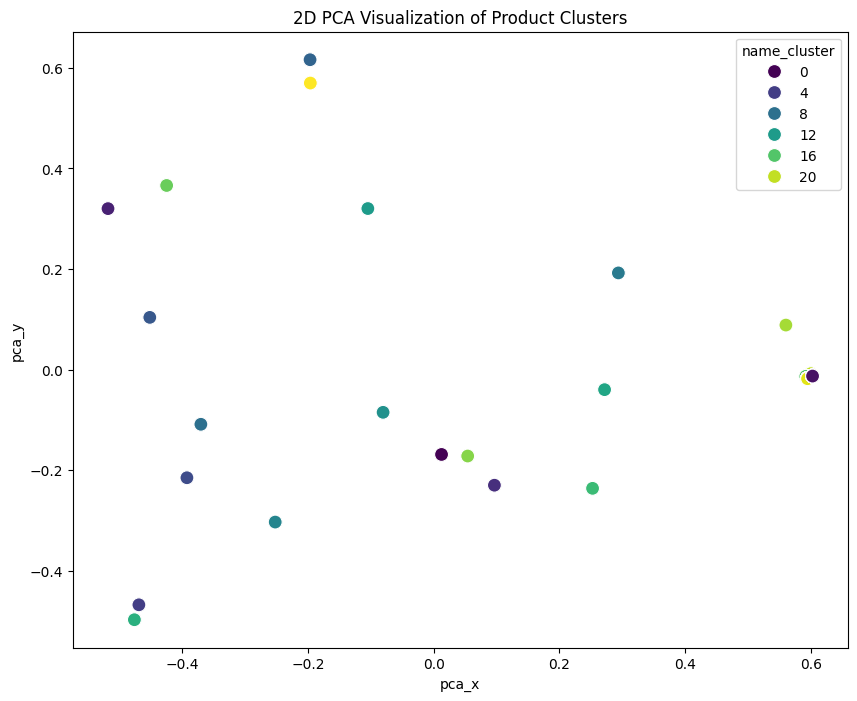

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(X.toarray())

# Create a DataFrame for PCA results with product names
pca_df = pd.DataFrame({
	'product_name': product_names,
	'pca_x': tfidf_2d[:, 0],
	'pca_y': tfidf_2d[:, 1]
})

# Merge PCA coordinates into the main df based on product name
df = df.merge(pca_df, left_on='name', right_on='product_name', how='left')

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_x', y='pca_y', hue='name_cluster', data=df, palette='viridis', s=100)
plt.title('2D PCA Visualization of Product Clusters')
plt.show()

## Step 8: Identify 5 Best products

5 Best products

In [ ]:
sorted_df = df.sort_values(by=["rating", "text"], ascending=[False, False])
unique_best = sorted_df.drop_duplicates(subset="name", keep="first")
best_products = unique_best.head(5)

In [ ]:
for _, row in best_products.iterrows():
    print(f"Image URL: {row['imageURLs']}")
    print(f"Product Name: {row['name']}")
    print(f"Review: {row['clean_text']}")
    print(f"Rating: {row['rating']}")
    print(f"Primary Categories: {row['primaryCategories']}")
    print("-" * 40)
    
def process_review(image_url, review, rating):
    print(f"Processing: {image_url}, {review}, {rating}")

Image URL: http://i.ebayimg.com/thumbs/images/g/3MIAAOSwol5Y4W6z/s-l96.jpg,https://pisces.bbystatic.com/image2/BestBuy_US/images/products/5023/5023200_sa.jpg,http://i.ebayimg.com/thumbs/images/g/amcAAOSw6ShZSpke/s-l200.jpg,http://i.ebayimg.com/thumbs/images/g/PJgAAOSwiDFYPE8h/s-l200.jpg,http://i.ebayimg.com/thumbs/images/g/TPQAAOSwHb9Zcih6/s-l96.jpg,https://pisces.bbystatic.com/image2/BestBuy_US/images/products/5023/5023200_sd.jpg,http://i.ebayimg.com/thumbs/images/g/J4EAAOSw4CFYnSS8/s-l200.jpg,http://i.ebayimg.com/thumbs/images/g/LFQAAOSw1BlZWfTe/s-l200.jpg,http://images.frys.com/art/product/box_shots/8819902.box.GIF,http://i.ebayimg.com/thumbs/images/g/KO8AAOSw8GtZUbHj/s-l200.jpg,http://i.ebayimg.com/images/g/wv8AAOSw0W1ZjNVZ/s-l64.jpg,http://i.ebayimg.com/thumbs/images/g/I6UAAOSw-0xYc7VD/s-l200.jpg,http://i.ebayimg.com/thumbs/images/g/TPQAAOSwHb9Zcih6/s-l200.jpg,http://i.ebayimg.com/thumbs/images/g/fIMAAOSwlMFZN7Zq/s-l200.jpg,http://i.ebayimg.com/images/g/sVAAAOSwH6tZjNVW/s-l64.jpg,

Worst Product

In [ ]:
from IPython.display import Image, display

worst_product = df.sort_values(by='label', ascending=True).head(1)

print("\nWorst Product:")
for index, row in worst_product.iterrows():
    #display(Image(url=url, width=100, height=100))
    print(f"Image URL: {row['imageURLs']}")
    print(f"Product Name: {row['name']}")
    print(f"Review: {row['clean_text']}")
    print(f"Rating: {row['rating']}")
    print(f"Primary Categories: {row['primaryCategories']}")
    print("-" * 40)

def process_review(image_url, review, rating):
    print(f"Processing: {image_url}, {review}, {rating}")


Worst Product:
Image URL: https://static.bhphoto.com/images/images500x500/amazon_b010cehqtg_echo_show_white_1502460407000_1353417.jpg,https://c1.neweggimages.com/NeweggImage/ProductImage/81-511-001-V01.jpg,https://i5.walmartimages.com/asr/5638a5f1-ac87-4f19-a40a-1c8f97667060_1.eb5a3b378540fee9c3df5c656a718cd9.jpeg%252525253FodnHeight%252525253D450%2525252526odnWidth%252525253D450%2525252526odnBg%252525253DFFFFFF,https://i5.walmartimages.com/asr/db02a974-11af-4de9-b228-c36426eb2b44_1.22c5de2dd319a4ae3a2f23548c464eb1.jpeg%252525253FodnHeight%252525253D450%2525252526odnWidth%252525253D450%2525252526odnBg%252525253DFFFFFF,https://static.bhphoto.com/images/images500x500/amazon_echo_show_2_pack_white_1506004002000_1353763.jpg,https://www.barcodable.com/images/barcode/0848719084894.png,https://c1.neweggimages.com/NeweggImage/ProductImage/81-511-001-V02.jpg,https://c1.neweggimages.com/NeweggImage/ProductImage/81-511-001-Z01.jpg,https://images-na.ssl-images-amazon.com/images/I/51YHTHvHapL.jpg,